# Homework #5

Winter 2025 - UCLA, Student: Budhaditya De, UCLA ID: 206182210

### Introduction

In this homework, a python script is developed using functions for carrying out health state prediction of ball bearings of a shaft driven by a motor. Raw acceleration data was provided for the bearings for each type of health state and the task is to extract relevant features out of the raw data and develop a robust ML model for accurate prediction of the health states given any combination of the features.

In [1]:
%load_ext autoreload
%autoreload 2
%reset -f

## Task 

1.) First, the raw acceleration data was imported and processed to take care of any possible NaNs and forward fill them. The acceleration data for all health states were stacked one after the other along with the corresponding health states to create a matrix of 10,000,000 x 2 size. The data was then splitted 70/30 with shuffling and random seed of 42.

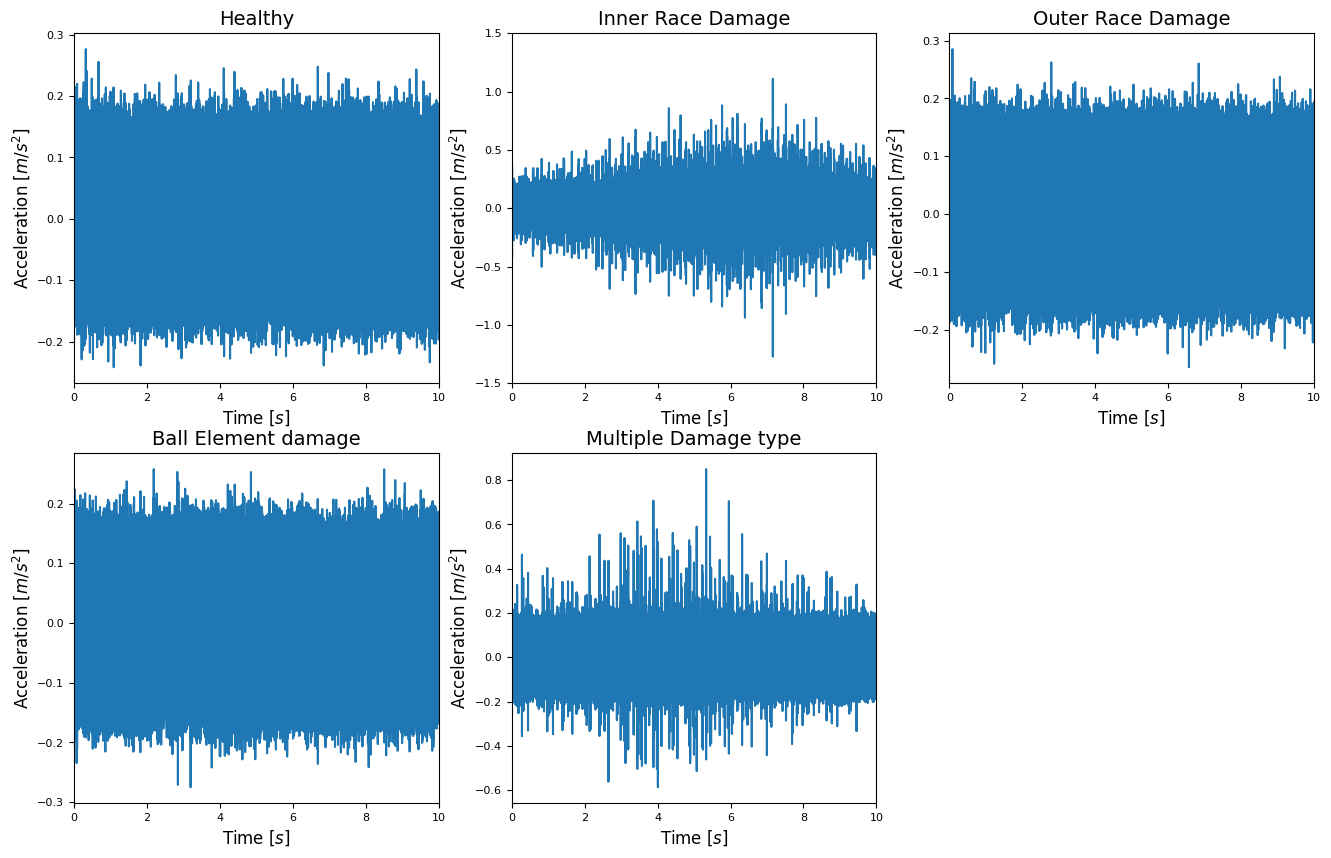

In [2]:
import hw5

x_train,x_test,y_train,y_test = hw5.prelim_data()

Fig. 1: Acceleration-time history plots for the ball bearings for each health state

2.) Plots of the acceleration vs time history for the ball bearings for each health state is shown above for visualization

3.) Initially a Machine Learning model was fit on the raw acceleration data for predict the health states of the ball bearings. Out of all possible models, the Decision tree was found to be most suitable with the following hyperparameter values: criterion = 'gini', max_depth = 100, min_samples_split = 2, min_samples_leaf = 1, min_impurity_decrease = 0, random_state = 42. Results through performance metrics and confusion matrix is shown below. As evident from the performance metrics and confusion matrix, prediction on the raw data is very poor along with an significant runtime. This hints at using features (time/frequency domain quantities) extracted from this data and then attempting to fit a suitable model for better performance as discussed in the subsequent sections.

Accuracy on train dataset: 61.97%
                     precision    recall  f1-score   support

     Normal/Healthy    0.20338   0.24651   0.22288    600422
  Inner Race damage    0.23787   0.18872   0.21046    599845
  Outer Race damage    0.20511   0.27118   0.23356    599360
Ball element damage    0.20212   0.20274   0.20243    600425
    Combined damage    0.20043   0.13419   0.16075    599948

           accuracy                        0.20866   3000000
          macro avg    0.20978   0.20867   0.20602   3000000
       weighted avg    0.20978   0.20866   0.20601   3000000

Balanced Accurancy: 0.20867
Unbalanced Accurancy: 0.20866


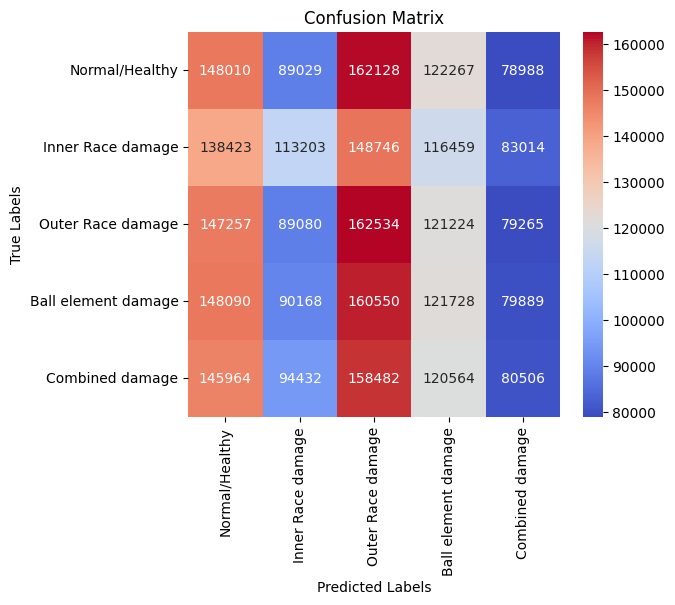

In [3]:
hw5.ML_model_raw_data(x_train,x_test,y_train,y_test)

Fig.2: Confusion matrix for health state prediction of ball bearings based on raw acceleration data

4.) Time domain feature extraction. 8 features were extracted in time domain from the acceleration data for all ball bearing health state conditions. Since for each health state, the length of the data is large (2,000,000 rows), we use a fairly large window length and overlap size for better capturing of the high frequency features. For the study, window length of 20,000 and overlap of 19,600 was chosen. 

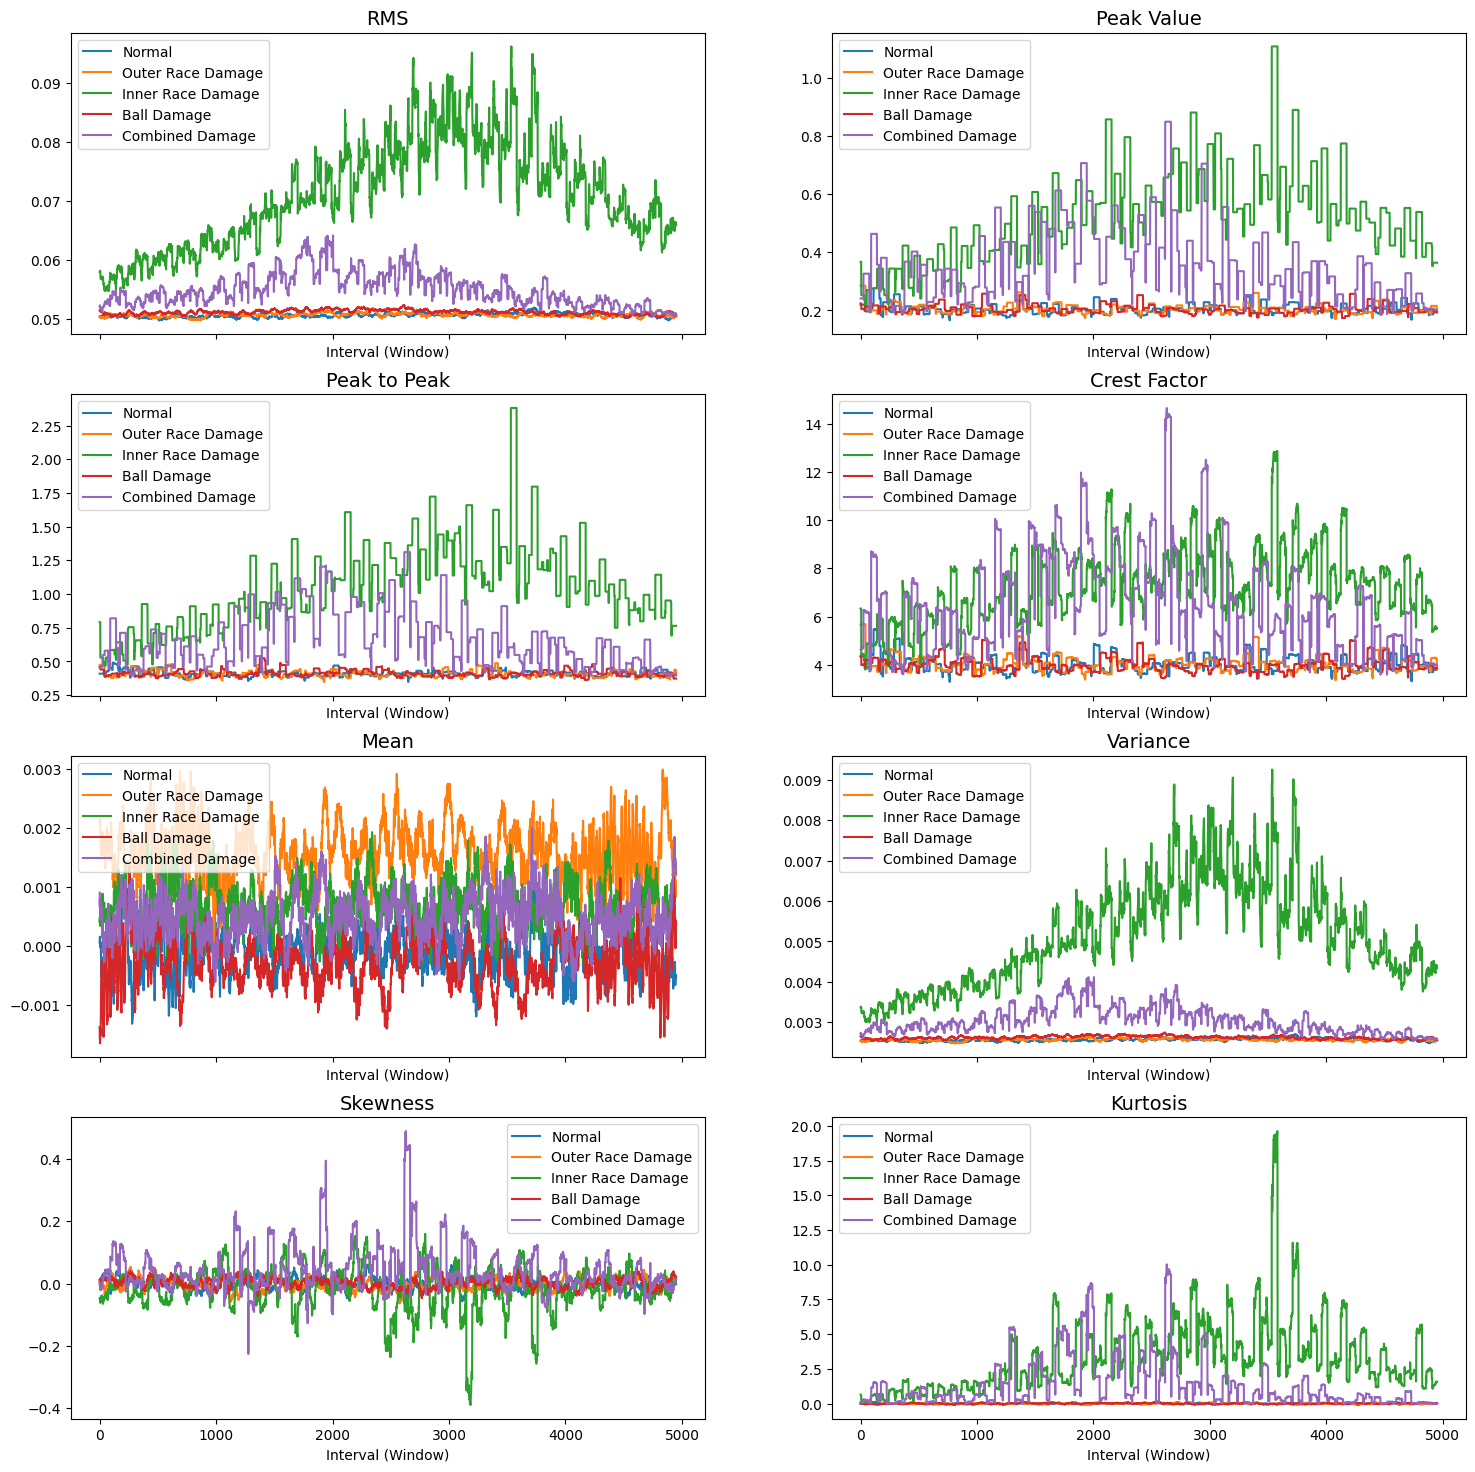

In [4]:
P_H, P_I, P_O, P_B, P_C = hw5.time_domain_features()

Fig.3: Time domain features for acceleration data from different health states of the ball bearings

5.) Frequency domain feature extraction. Similar to the time domain, features in the frequency domain were extracted in the form of 'bands' using the fast fourier transform (fft) method. Again window size of 20,000 and overlap of 19,600 was utilized.

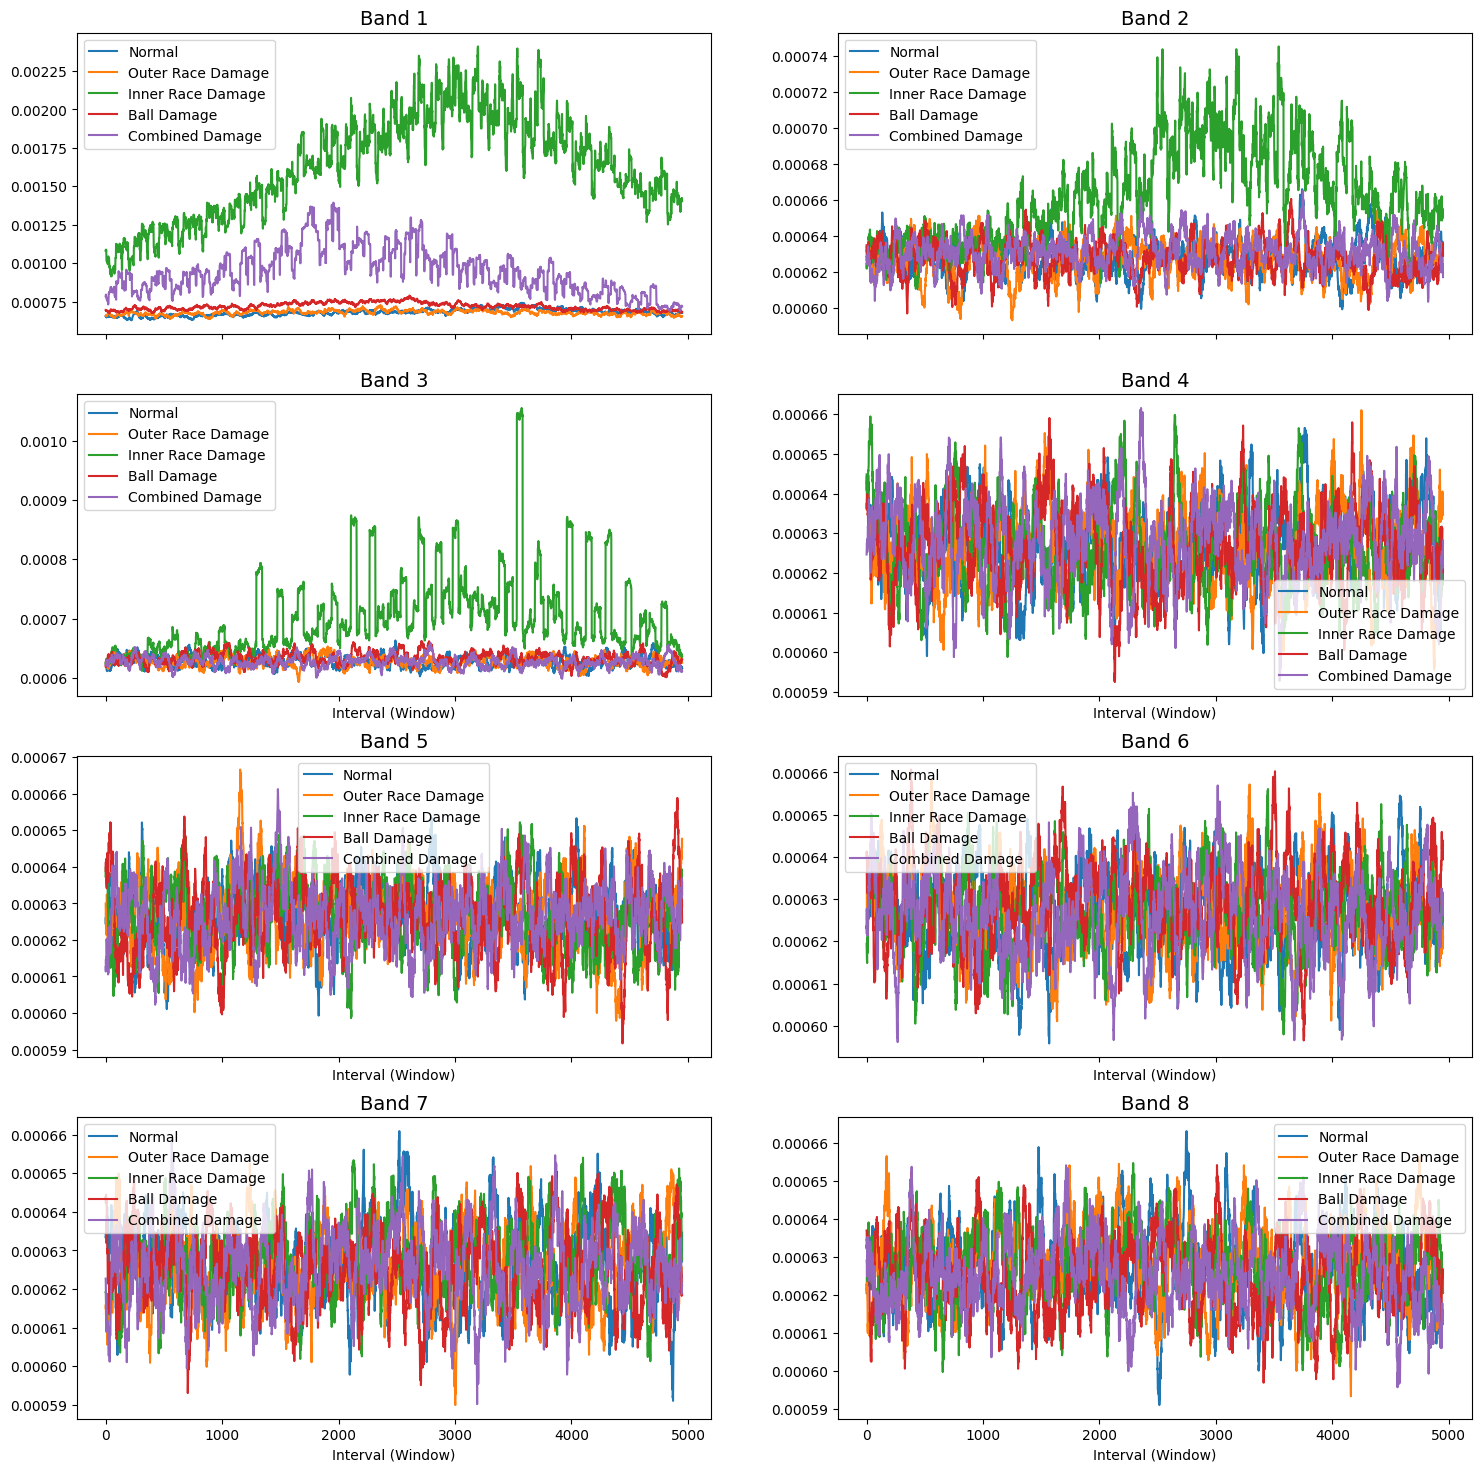

In [5]:
E_H, E_I, E_O, E_B, E_C = hw5.frequency_domain_features()

Fig. 4: Frequency domain features for acceleration data from different health states of the ball bearings

6.) Machine Learning model for feature extracted data. 

Now with the time and frequency domain features extracted out of the acceleration data, a Machine Learning model is fitted to the new dataframe consisting of these features and corresponding health state labels. The time and frequency domain features are arranged together (all features are used initially). The below function takes in all the time and frequency domain features, applies the COV (> 0.05) and redundancy (correlation of > 95%) based feature removal and with the remaining features, splits the dataframe into train/test partitions in 70/30 ratio.

In [8]:
x_train, x_test, y_train, y_test = hw5.feature_arrangement_and_reduction(P_H,P_I,P_O,P_B,P_C,E_H,E_I,E_O,E_B,E_C)

Now amongst all the alternatives, the Random Forest model was observed to provide the best prediction results for the ball bearing health states. Only the results of this model are presented in the report. The hyperparameters usedwere: criterion = 'gini',  max_depth = 20,  min_samples_split = 2, min_samples_leaf = 1, min_impurity_decrease = 0, random_state = 42, n_estimators = 100, bootstrap = True, oob_score = False

Accuracy on train dataset: 100.00%
                     precision    recall  f1-score   support

     Normal/Healthy    0.94915   0.97849   0.96360      1488
  Inner Race Damage    0.99932   0.99865   0.99899      1481
  Outer Race Damage    0.98673   0.99001   0.98837      1502
Ball element Damage    0.97087   0.95470   0.96271      1501
    Combined Damage    0.99510   0.97801   0.98648      1455

           accuracy                        0.97994      7427
          macro avg    0.98024   0.97997   0.98003      7427
       weighted avg    0.98015   0.97994   0.97997      7427

Balanced Accurancy: 0.97997
Unbalanced Accurancy: 0.97994


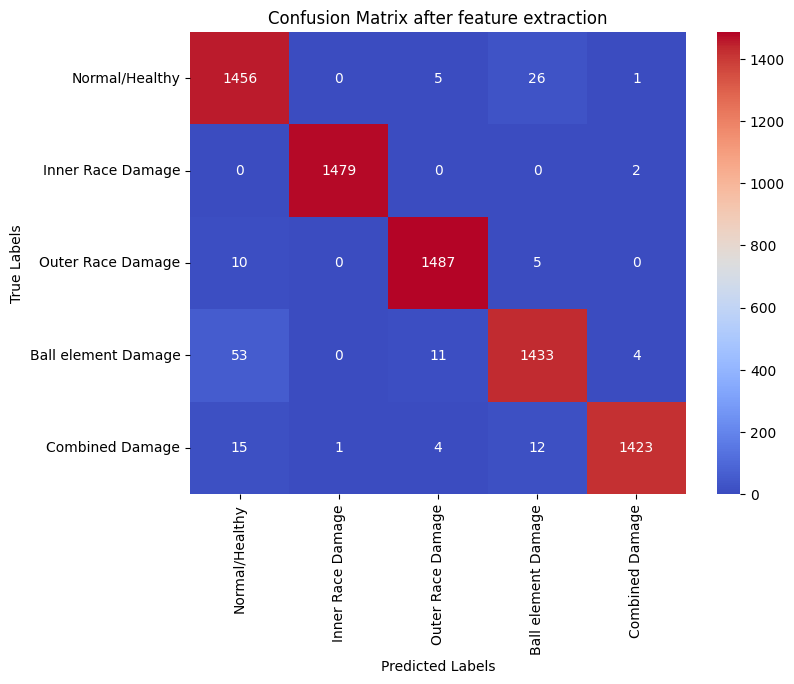

In [9]:
cm = hw5.ML_features(x_train, x_test, y_train, y_test)

Fig. 5: Confusion matrix for health state prediction of ball bearings based on feature extracted data with feature reduction

Next, the true positive rate is computed based on the number of true health state predictions normalized by the actual number of the concerned health state observed. 

In [10]:
hw5.true_positive_percent(cm)

True Positive Percentage for Normal/Healthy: 97.85%
True Positive Percentage for Inner Race Damage: 99.86%
True Positive Percentage for Outer Race Damage: 99.00%
True Positive Percentage for Ball element Damage: 95.47%
True Positive Percentage for Combined Damage: 97.80%


The performance metrics and the confusion matrix shown above exhibit the excellent prediction capability of the trained random forest model. The true positive percentages for all the health states are estimated to be superior than the minimum thresholds asked in the prompt. 

For comparison propose, the machine learning model was also fitted to the dataset without dropping any features based on COV and correlation. All 16 features (i.e. time and frequency domain features) were retained and the Random forest model was fit with the same hyperparameters. The results are shown below.

Accuracy on train dataset: 100.00%
                     precision    recall  f1-score   support

     Normal/Healthy    0.98208   0.99462   0.98831      1488
  Inner Race Damage    1.00000   0.99932   0.99966      1481
  Outer Race Damage    0.99401   0.99401   0.99401      1502
Ball element Damage    0.99060   0.98334   0.98696      1501
    Combined Damage    0.99862   0.99381   0.99621      1455

           accuracy                        0.99300      7427
          macro avg    0.99306   0.99302   0.99303      7427
       weighted avg    0.99303   0.99300   0.99300      7427

Balanced Accurancy: 0.99302
Unbalanced Accurancy: 0.99300


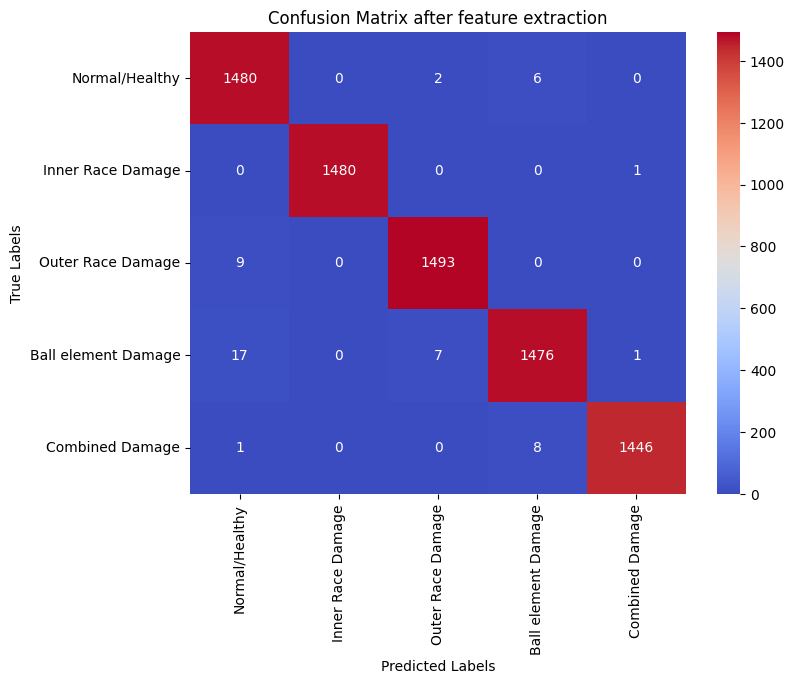

In [11]:
cm = hw5.ML_without_feature_reduction(P_H,P_I,P_O,P_B,P_C,E_H,E_I,E_O,E_B,E_C)

Fig. 6: Confusion matrix for health state prediction of ball bearings based on feature extracted data without feature reduction

The true positive percentages are recomputed with the results without feature dropping

In [12]:
hw5.true_positive_percent_all_features(cm)

True Positive Percentage for Normal/Healthy: 99.46%
True Positive Percentage for Inner Race Damage: 99.93%
True Positive Percentage for Outer Race Damage: 99.40%
True Positive Percentage for Ball element Damage: 98.33%
True Positive Percentage for Combined Damage: 99.38%



It appears that without feature reduction, the results are better than those with feature reduction based on COV and covariance. In the real world application, although feature reduction constitutes a basic step in the ML model training pipeline, we should make a judicious decision after comparing results both with and without feature reduction.